# Extracting Each CMYK Channels Into Seperate Image File

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import os
import sys

sys.path.append(os.path.abspath("../"))
from src.helper import prepend_zero, rgb_to_cmyk, calculate_cmyk_percentage

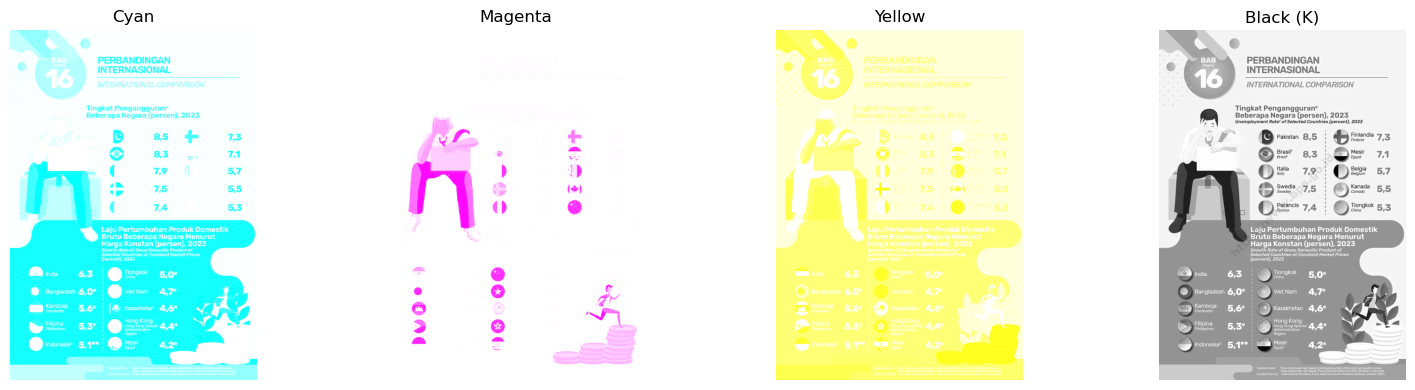

In [2]:
# Membaca gambar
img = Image.open("../outputs/pdfium_150dpi/page-853.jpg")

# Memisahkan channel CMYK
cmyk = rgb_to_cmyk(img)
c, m, y, k = cmyk[:,:,0], cmyk[:,:,1], cmyk[:,:,2], cmyk[:,:,3]


# Membuat cmap custom untuk cmyk
cmap_cyan = LinearSegmentedColormap.from_list("custom_cyan", ["#FFFFFF", "#00FFFF"])  # Dari putih ke cyan
cmap_magenta = LinearSegmentedColormap.from_list("custom_magenta", ["#FFFFFF", "#FF00FF"])  # Dari putih ke magenta
cmap_yellow = LinearSegmentedColormap.from_list("custom_yellow", ["#FFFFFF", "#FFFF00"])  # Dari putih ke kuning
cmap_black = LinearSegmentedColormap.from_list("custom_black", ["#FFFFFF", "#000000"])  # Dari putih ke hitam

# Menampilkan gambar CMY (Cyan, Magenta, Yellow) tanpa Black
fig, ax = plt.subplots(1, 4, figsize=(16, 4))  # 1 baris, 4 kolom

# Menampilkan masing-masing channel dengan cmap='gray'
ax[0].imshow(c, cmap=cmap_cyan)  # Channel Cyan
ax[0].set_title("Cyan")
ax[0].axis('off')  # Mematikan axis

ax[1].imshow(m, cmap=cmap_magenta)   # Channel Magenta
ax[1].set_title("Magenta")
ax[1].axis('off')  # Mematikan axis

ax[2].imshow(y, cmap=cmap_yellow)  # Channel Yellow
ax[2].set_title("Yellow")
ax[2].axis('off')  # Mematikan axis

# Menampilkan channel Black secara terpisah
ax[3].imshow(k, cmap=cmap_black)    # Channel Black
ax[3].set_title("Black (K)")
ax[3].axis('off')  # Mematikan axis

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan gambar
plt.show()


In [3]:
calculate_cmyk_percentage(img)

(36.0, 4.55, 34.09, 24.05)

In [123]:
def save_image_with_cmap(data, cmap, filename):
    """Menerapkan colormap dan menyimpan gambar."""
    # Apply colormap
    rgba_img = cmap(data)  # Apply colormap
    
    # Ubah ke format gambar RGB (tiga channel, drop alpha)
    rgb_img = (rgba_img[:, :, :3] * 255).astype(np.uint8)  # Konversi ke RGB
    
    # Menggunakan PIL untuk menyimpan gambar
    pil_img = Image.fromarray(rgb_img)  # Mengonversi array ke gambar
    pil_img.save(filename)  # Menyimpan gambar ke file

# Menyimpan channel CMY (Cyan, Magenta, Yellow) dengan cmap
save_image_with_cmap(c, cmap_cyan, "../outputs/images/page-853-cyan_channel.png")
save_image_with_cmap(m, cmap_magenta, "../outputs/images/page-853-magenta_channel.png")
save_image_with_cmap(y, cmap_yellow, "../outputs/images/page-853-yellow_channel.png")
save_image_with_cmap(k, cmap_black, "../outputs/images/page-853-black_channel.png")